# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [9]:
import pandas as pd
import fitz  

df = pd.read_csv('sinasc_RO_2019.csv')
print("✅ Base de dados carregada com sucesso!")
print(df.head()) 

pdf_path = 'Estrutura_SINASC_para_CD.pdf'
with fitz.open(pdf_path) as pdf:
    for page_num in range(len(pdf)):
        page = pdf[page_num]
        print(f"\n📄 Página {page_num+1}:\n")
        print(page.get_text())


✅ Base de dados carregada com sucesso!
   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0      8 a 11 anos         NaN         0.0         0.0  ...           5   
1      8 a 11 anos    999992.0         1.0         0.0  ...           5   
2      8 a 11 anos    513205.0         2.0         0.0  ...           5   
3  12 anos ou mais    231205.0         0.0         0.0  ...           4   
4      8 a 11 anos    999992.0         1.0         0.0  ...           5   

  CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0        1        ATIVO      MUNIC    Al

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

C:\Users\shinoki\AppData\Local\Temp\ipykernel_19768\1472821940.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette="viridis", order=df[var].value_counts().index)
C:\Users\shinoki\AppData\Local\Temp\ipykernel_19768\1472821940.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette="viridis", order=df[var].value_counts().index)
C:\Users\shinoki\AppData\Local\Temp\ipykernel_19768\1472821940.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette="viridis", order=df[var].va

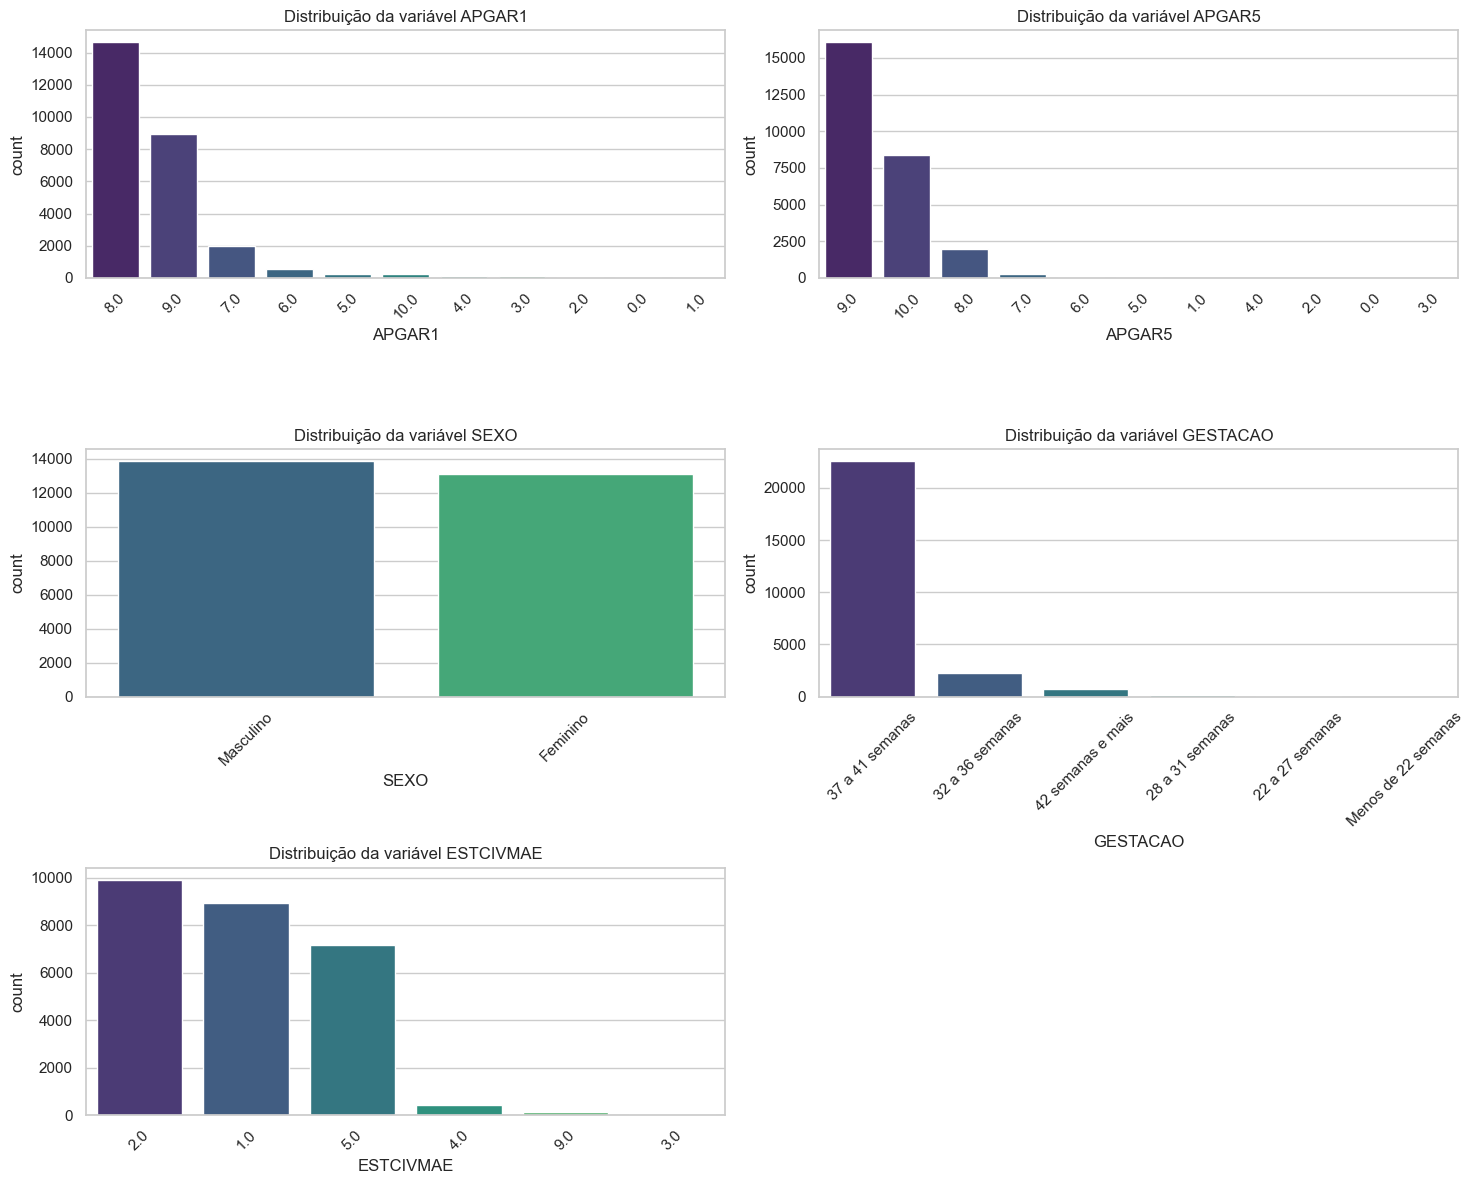

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sinasc_RO_2019.csv')

sns.set(style="whitegrid")

variaveis = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']

plt.figure(figsize=(15, 12))

for i, var in enumerate(variaveis):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=var, palette="viridis", order=df[var].value_counts().index)
    plt.title(f'Distribuição da variável {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

C:\Users\shinoki\AppData\Local\Temp\ipykernel_19768\3214984609.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_apgar5, x='CONSULTAS', y='APGAR5', palette='mako')


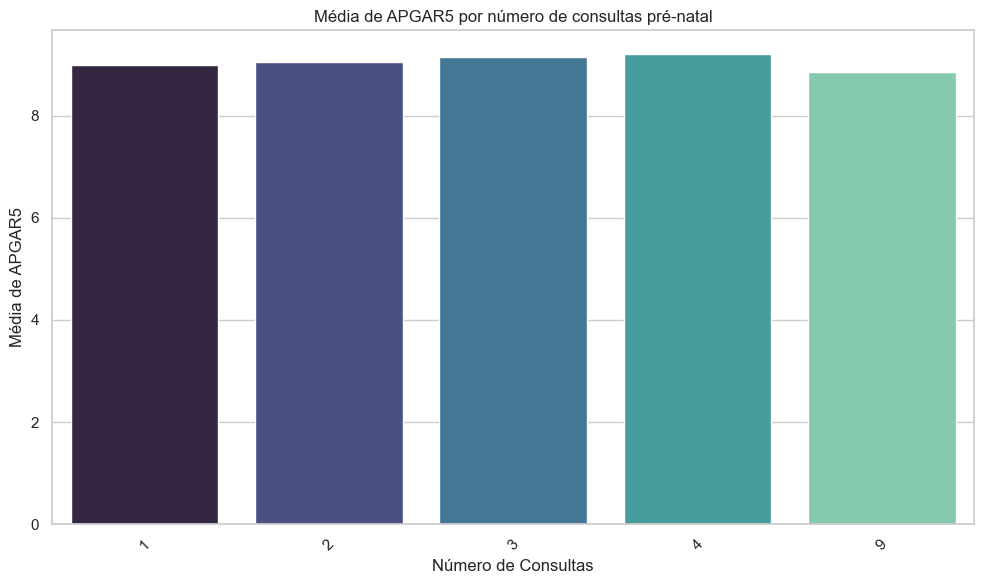

In [4]:
media_apgar5 = df.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

media_apgar5 = media_apgar5.sort_values(by='CONSULTAS')

plt.figure(figsize=(10, 6))
sns.barplot(data=media_apgar5, x='CONSULTAS', y='APGAR5', palette='mako')

plt.title('Média de APGAR5 por número de consultas pré-natal')
plt.xlabel('Número de Consultas')
plt.ylabel('Média de APGAR5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

C:\Users\shinoki\AppData\Local\Temp\ipykernel_19768\957623962.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', ax=ax, order=df[var].value_counts().index)
C:\Users\shinoki\AppData\Local\Temp\ipykernel_19768\957623962.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', ax=ax, order=df[var].value_counts().index)
C:\Users\shinoki\AppData\Local\Temp\ipykernel_19768\957623962.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', ax=ax

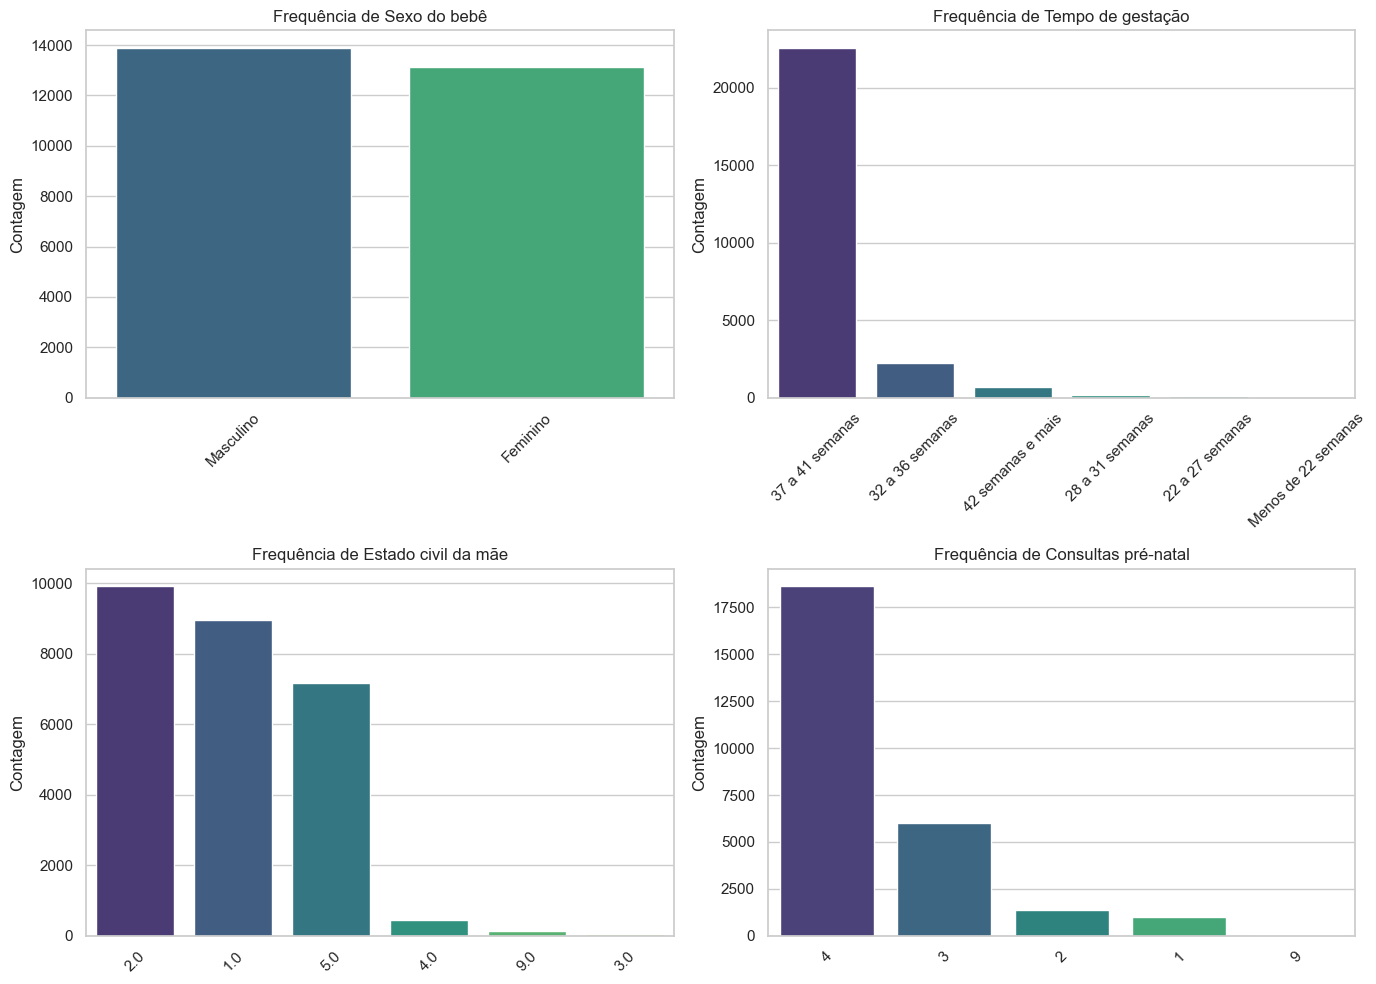

In [6]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

variaveis = ['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']
titulos = ['Sexo do bebê', 'Tempo de gestação', 'Estado civil da mãe', 'Consultas pré-natal']

for i, ax in enumerate(axes.flat):
    var = variaveis[i]
    sns.countplot(data=df, x=var, palette='viridis', ax=ax, order=df[var].value_counts().index)
    ax.set_title(f'Frequência de {titulos[i]}')
    ax.set_xlabel('')
    ax.set_ylabel('Contagem')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()